## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

In [3]:
# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
# Checking the number of mice.
len(pd.unique(mouse_df['Mouse ID']))

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index()
dupes.columns = ["Mouse ID", "Timepoint", "Count"]
dupes.sort_values(by="Count", ascending=False).head()

,Mouse ID,Timepoint,Count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop_df = mouse_df.loc[mouse_df["Mouse ID"] != "g989"]
mouse_drop_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(mouse_drop_df['Mouse ID']))

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

reg_mean = mouse_drop_df.groupby("Drug Regimen").mean()
reg_median = mouse_drop_df.groupby("Drug Regimen").median()
reg_var = mouse_drop_df.groupby("Drug Regimen").var()
reg_std = mouse_drop_df.groupby("Drug Regimen").std()
reg_sem = mouse_drop_df.groupby("Drug Regimen").sem()

In [11]:
# Selecting Tumor Volume column
reg_mean = mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_median = mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [12]:
summary = pd.DataFrame(reg_mean)
summary.rename(columns = {'Tumor Volume (mm3)':'Tumor Mean'}, inplace=True)
summary["Tumor Median"] = pd.DataFrame(reg_median)
summary["Tumor Var"] = pd.DataFrame(reg_var)
summary["Tumor Std"] = pd.DataFrame(reg_std)
summary["Tumor SEM"] = pd.DataFrame(reg_sem)
summary

,Tumor Mean,Tumor Median,Tumor Var,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mouse_count = mouse_drop_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_count = pd.DataFrame(mouse_count)
mouse_count.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
mouse_count

,Mouse Count
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


Text(0, 0.5, 'Mouse Count')

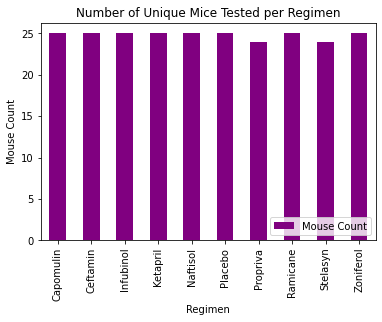

In [15]:
mouse_count.plot(kind="bar", color=['purple']).legend(loc='lower right')

plt.title("Number of Unique Mice Tested per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Mouse Count")

In [16]:
mouse_count = mouse_count.reset_index()

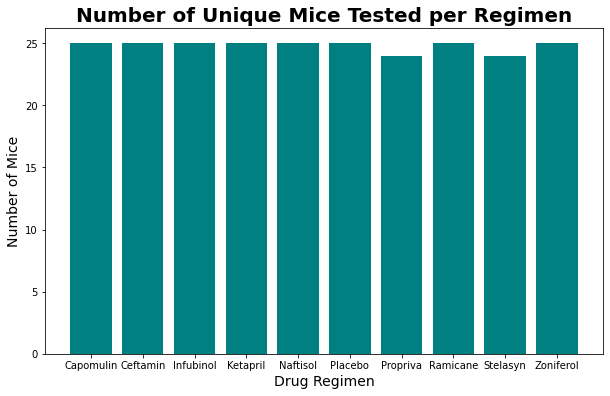

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(mouse_count["Drug Regimen"], mouse_count["Mouse Count"], color="teal")

plt.title("Number of Unique Mice Tested per Regimen", fontsize=20, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gen = mouse_drop_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
mouse_gen_count = mouse_gen.groupby("Sex").count()
mouse_gen_count.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
mouse_gen_count

,Mouse Count
Sex,
Female,123
Male,125


array([<AxesSubplot:ylabel='Mouse Count'>], dtype=object)

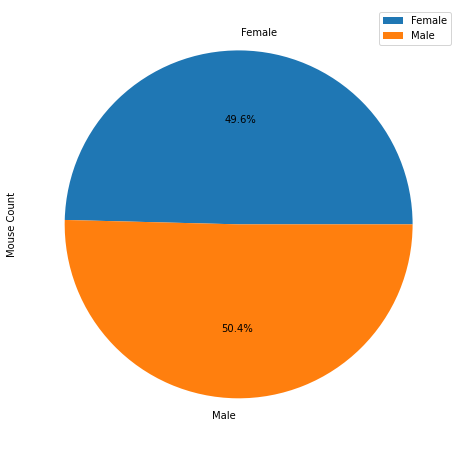

In [19]:
mouse_gen_count.plot(kind="pie", subplots=True, autopct='%1.1f%%', figsize=(8, 8))

In [20]:
mouse_gen_count.index

Index(['Female', 'Male'], dtype='object', name='Sex')

In [21]:
mouse_gen_count["Mouse Count"].values

array([123, 125], dtype=int64)

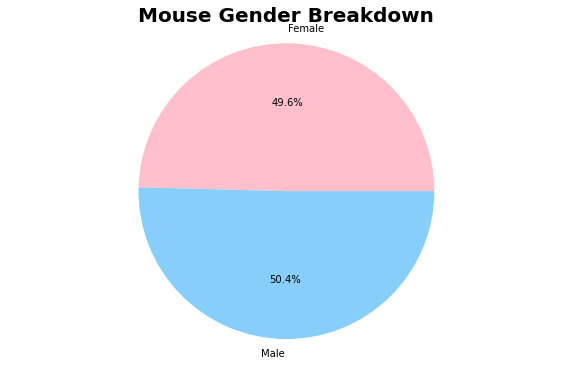

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(10,6))
plt.pie(mouse_gen_count["Mouse Count"].values, labels=mouse_gen_count.index, colors=["pink", "lightskyblue"], autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Mouse Gender Breakdown", fontsize=20, fontweight="bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [24]:
final_volume = mouse_drop_df.groupby(["Mouse ID", "Drug Regimen"])
final_volume = final_volume["Timepoint"].max()
final_volume = final_volume.reset_index()
final_volume2 = pd.merge(final_volume, mouse_drop_df, on=["Mouse ID", "Drug Regimen", "Timepoint"], how="left")
final_volume2.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29


In [25]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volume3 = final_volume2[final_volume2["Drug Regimen"].isin(drug_list)].reset_index(drop=True)
final_volume3.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = final_volume3["Drug Regimen"].tolist()

# Create empty list to fill with tumor vol data (for plotting)

tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# quartiles = final_volume3["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes

for row in range(len(final_volume3)):
    if final_volume3.loc[row, "Drug Regimen"] == "Capomulin":
        tumor_cap.append(final_volume3.loc[row, "Tumor Volume (mm3)"])
    elif final_volume3.loc[row, "Drug Regimen"] == "Ramicane":
        tumor_ram.append(final_volume3.loc[row, "Tumor Volume (mm3)"])
    elif final_volume3.loc[row, "Drug Regimen"] == "Infubinol":
        tumor_inf.append(final_volume3.loc[row, "Tumor Volume (mm3)"])
    else:
        tumor_cef.append(final_volume3.loc[row, "Tumor Volume (mm3)"])
       
    # add subset 

tumor_iqr_df = pd.DataFrame([tumor_cap, tumor_ram, tumor_inf, tumor_cef]).T
tumor_iqr_df.columns = ["Cap_Volume", "Ram_Volume", "Inf_Volume", "Cef_Volume"]

# tumor_cap_df = pd.DataFrame(tumor_cap) 
# tumor_cap_df.columns = ["Volume"]
    
    # Determine outliers using upper and lower bounds

# quartiles = tumor_cap_df["Volume"].quantile([.25,.5,.75])
lowerq = tumor_iqr_df.quantile(0.25)
upperq = tumor_iqr_df.quantile(0.75)
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = tumor_iqr_df[((tumor_iqr_df < lower_bound) | (tumor_iqr_df > upper_bound))]
outlier
# outlier = tumor_iqr_df[(tumor_cap_df < lower_bound) | (tumor_cap_df > upper_bound)]
# outlier

,Cap_Volume,Ram_Volume,Inf_Volume,Cef_Volume
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,36.321346,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [27]:
# Verifying outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below Cap_Volume    20.704562
Ram_Volume    17.912664
Inf_Volume    36.832905
Cef_Volume    25.355450
dtype: float64 could be outliers.
Values above Cap_Volume    51.832015
Ram_Volume    54.306811
Inf_Volume    82.741446
Cef_Volume    87.666458
dtype: float64 could be outliers.


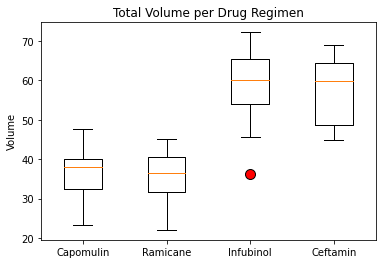

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Total Volume per Drug Regimen")
ax1.set_ylabel("Volume")
ax1.boxplot(tumor_iqr_df, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = mouse_drop_df.loc[mouse_df["Mouse ID"] == "m601"]
mouse_line

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


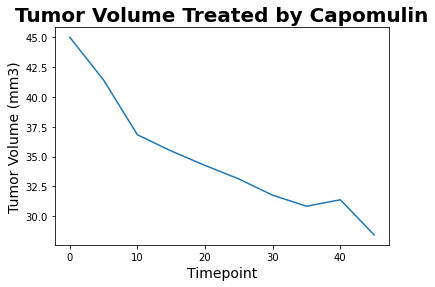

In [30]:
plt.plot(mouse_line["Timepoint"], mouse_line["Tumor Volume (mm3)"])
plt.title("Tumor Volume Treated by Capomulin", fontsize=20, fontweight="bold")
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_scatter = mouse_drop_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
mouse_avg_vol = mouse_scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().tolist()

In [32]:
mouse_weight = mouse_scatter.groupby("Mouse ID")
mouse_weight = mouse_weight["Weight (g)"].first().tolist()

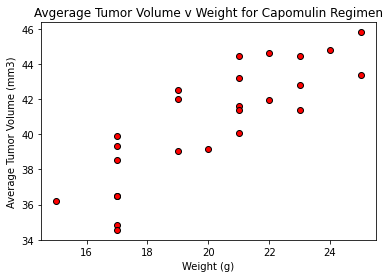

In [33]:
plt.title("Avgerage Tumor Volume v Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(mouse_weight, mouse_avg_vol, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, mouse_avg_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [35]:
reg_data = pd.DataFrame()
mouse_weight = mouse_scatter.groupby("Mouse ID")
reg_data = pd.DataFrame(mouse_weight["Weight (g)"].first())

In [36]:
mouse_scatter = mouse_drop_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
reg_data["Average Tumor Volume (mm3)"] = mouse_scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
reg_data["Weight (g)"] = reg_data["Weight (g)"].astype(float)

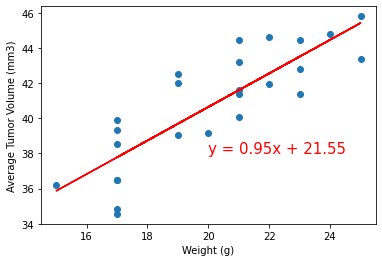

In [37]:
x_values = reg_data["Weight (g)"]
y_values = reg_data["Average Tumor Volume (mm3)"]

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [38]:
# observations and insights
'''
The boxplot shows the consistency of the drug regimens having only one outlier. Also, Infubinol and Ceftamin were used to treat
the mice with higher tumor volume while Capomulin and Ramicane took care of those with lower tumor volume.

In focusing on the Capomulin regimen, the treatment reduces the tumor volume over time based on the line plot.

At first glance, the scatter plot shows a positive correlation between weight and average tumor volume. That observation is
verified having a correlation coefficient of .84 and a very positive slope in the linear regression model.
'''

'\nThe boxplot shows the consistency of the drug regimens having only one outlier. Also, Infubinol and Ceftamin were used to treat\nthe mice with higher tumor volume while Capomulin and Ramicane took care of those with lower tumor volume.\n\nIn focusing on the Capomulin regimen, the treatment reduces the tumor volume over time based on the line plot.\n\nAt first glance, the scatter plot shows a positive correlation between weight and average tumor volume. That observation is\nverified having a correlation coefficient of .84 and a very positive slope in the linear regression model.\n'